<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_beat_DTW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Heart rate equqlization function

In [65]:
from scipy.signal import find_peaks
def rescale(arr, no_samples):
    n = len(arr)
    factor = no_samples/n
    return np.interp(np.linspace(0, n, int(factor*n+1)), np.arange(n), arr)

def heart_rate_equqlization(data_frame,no_samples,n_signals = 10001,p_threshold = 0.7):
  eq_rate_data = pd.DataFrame()
  for i in range(n_signals):
    print("signal number ",i)
    peaks, _ = find_peaks(data_frame.loc[i], height=p_threshold)
    
    np_sig = data_frame.iloc[i,:].values
    #print("original signal : ")
    #print(np_sig)
    #print("=============================")

    mid_peak = peaks[int(len(peaks)/2)]
    start = mid_peak
    stop =peaks[int(len(peaks)/2)+1]
    np_sig = np_sig[start:stop]
    #print("cuted signal [np_signale] \n ",np_sig)
    #print("=============================")
    
    
    scaled = rescale(np_sig,no_samples)
    df = pd.DataFrame(data = np.transpose(scaled) )
    #print("final shape is ",df.values.shape)
    #print(df.values)
    #print("**************************************")
    eq_rate_data = pd.concat([eq_rate_data , df],axis = 1,ignore_index=True)
  return eq_rate_data.transpose()

# reading data

In [51]:
ppg_csv2 = pd.read_csv("/content/gdrive/MyDrive/data/PPG_/2.csv")
ABP_csv2 = pd.read_csv("/content/gdrive/MyDrive/data/ABP_/2.csv")
ppg_csv2.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.62666,0.54721,0.47260,0.40627,0.35051,0.30641,0.27399,0.25228,0.23964,0.23397,...,0.74482,0.82479,0.88590,0.92470,0.93946,0.93015,0.89849,0.84767,0.78203,0.70660
1,0.03850,0.05744,0.08861,0.13297,0.19053,0.26018,0.33985,0.42655,0.51669,0.60637,...,0.05267,0.05805,0.06082,0.06036,0.05660,0.05009,0.04208,0.03443,0.02951,0.02998
2,0.02279,0.02457,0.02600,0.02805,0.03210,0.03981,0.05300,0.07341,0.10256,0.14146,...,0.00840,0.00365,0.00080,0.00000,0.00116,0.00397,0.00790,0.01232,0.01658,0.02016
3,0.24520,0.26009,0.27128,0.27849,0.28182,0.28170,0.27876,0.27377,0.26749,0.26060,...,0.11479,0.11281,0.11491,0.12155,0.13270,0.14788,0.16619,0.18644,0.20725,0.22726
4,0.57657,0.50368,0.42721,0.35303,0.28631,0.23107,0.18983,0.16350,0.15142,0.15160,...,0.37350,0.45685,0.53778,0.61003,0.66785,0.70663,0.72333,0.71686,0.68809,0.63987


In [5]:
ABP_csv2.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,95.002,90.997,87.431,84.403,82.107,80.349,79.127,78.297,77.858,77.760,...,143.16,142.19,140.82,139.16,137.45,135.640,133.690,131.630,129.530,127.480
1,95.002,90.997,87.431,84.403,82.107,80.349,79.127,78.297,77.858,77.760,...,143.16,142.19,140.82,139.16,137.45,135.640,133.690,131.630,129.530,127.480
2,125.290,122.990,120.500,117.810,114.880,111.560,107.950,103.990,99.935,95.734,...,111.61,120.55,127.97,133.69,137.54,139.990,141.310,141.600,141.160,140.230
3,60.322,60.127,59.883,59.687,59.492,59.297,59.101,59.004,58.808,58.662,...,144.63,145.60,145.56,144.63,143.16,141.450,139.450,137.250,135.010,132.760
4,65.988,69.554,77.369,89.971,105.700,121.570,135.440,147.120,156.550,163.580,...,111.36,107.12,103.99,101.89,100.47,99.691,99.349,99.251,99.154,99.105


In [6]:
blood_df = pd.DataFrame()
blood_df["systolic"] = ABP_csv2.iloc[:1000,:].max(axis = 1)
blood_df["diastolic"] = ABP_csv2.iloc[:1000,:].min(axis = 1)


In [7]:
blood_df.head()

,systolic,diastolic
0,144.43,52.947
1,144.43,52.947
2,143.36,52.752
3,146.48,54.998
4,177.11,65.060


In [62]:

scaled_df = heart_rate_equqlization(ppg_csv2,no_samples = 64,n_signals = 1000,p_threshold = 0.7)

signal number  0
signal number  1
signal number  2
signal number  3
signal number  4
signal number  5
signal number  6
signal number  7
signal number  8
signal number  9
signal number  10
signal number  11
signal number  12
signal number  13
signal number  14
signal number  15
signal number  16
signal number  17
signal number  18
signal number  19
signal number  20
signal number  21
signal number  22
signal number  23
signal number  24
signal number  25
signal number  26
signal number  27
signal number  28
signal number  29
signal number  30
signal number  31
signal number  32
signal number  33
signal number  34
signal number  35
signal number  36
signal number  37
signal number  38
signal number  39
signal number  40
signal number  41
signal number  42
signal number  43
signal number  44
signal number  45
signal number  46
signal number  47
signal number  48
signal number  49
signal number  50
signal number  51
signal number  52
signal number  53
signal number  54
signal number  55
si

IndexError: ignored

In [12]:
print(scaled_df.isna().sum(axis = 1))


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


In [13]:
scaled_df.shape

(1000, 65)

[600]
          0         1        2         3         4         5         6   \
600  0.95408  0.940342  0.91416  0.878078  0.834604  0.785976  0.733995   

           7         8         9   ...        55        56        57  \
600  0.679961  0.624724  0.568799  ...  0.385411  0.474647  0.566136   

           58        59        60        61        62        63       64  
600  0.655434  0.738267  0.810824  0.870083  0.913991  0.941504  0.94192  

[1 rows x 65 columns]


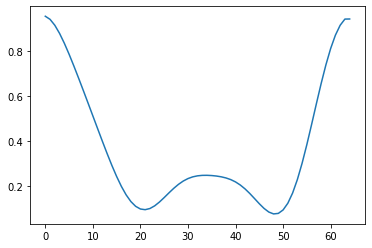

In [64]:
from numpy.random import randint

# generate some integers
row = randint(0, 999, 1)
print(row)
ppg_sig = scaled_df.iloc[row,:]
print(ppg_sig)
plt.plot(ppg_sig.values.T)

In [45]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 7.0 MB/s 


In [13]:
scaled_df.values.shape

(1000, 65)

Euclidean k-means
0.897 --> 0.600 --> 0.583 --> 0.581 --> 0.580 --> 0.580 --> 0.579 --> 0.579 --> 0.579 --> 0.579 --> 


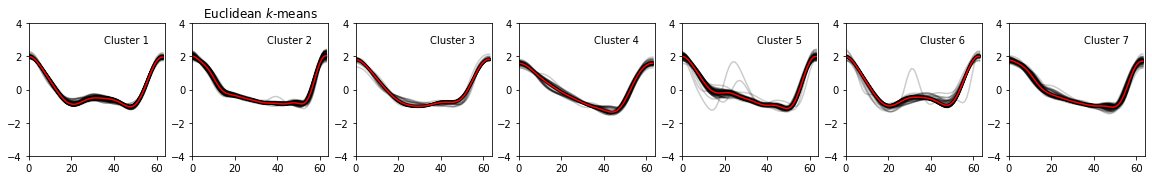

In [56]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(20,20))
for yi in range(7):
    plt.subplot(7,7, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")



In [47]:
blood_df["class"] = y_pred

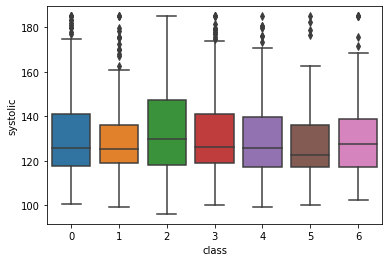

In [48]:
import seaborn as sns
sns.boxplot(x="class", y="systolic", data=blood_df)


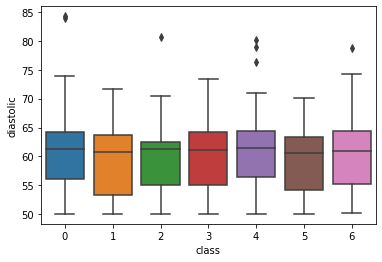

In [49]:
sns.boxplot(x="class", y="diastolic", data=blood_df)


DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

0.198 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.146 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.143 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.141 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.139 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.137 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

0.221 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.152 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.142 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.139 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.7s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.138 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.2s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    2.2s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.1s finished


0.137 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


0.137 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:    1.0s finished


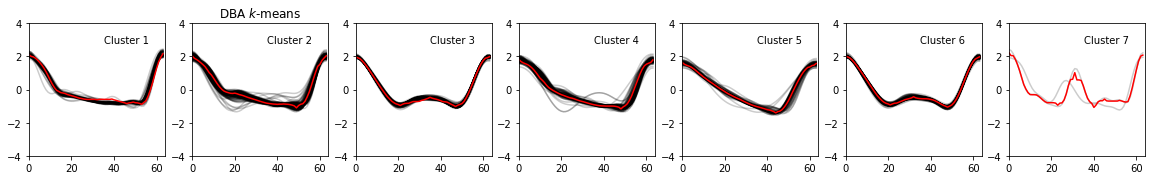

In [36]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=8,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)
plt.figure(figsize=(20,20))

for yi in range(7):
    plt.subplot(7, 7,1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")


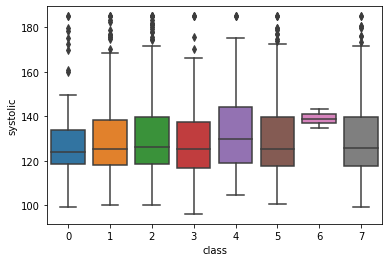

In [37]:
blood_df["class"] = y_pred
sns.boxplot(x="class", y="systolic", data=blood_df)


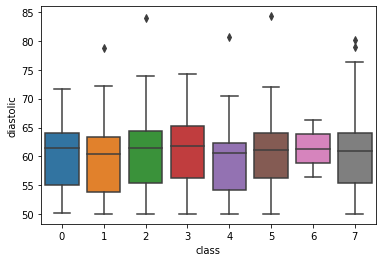

In [38]:
sns.boxplot(x="class", y="diastolic", data=blood_df)


Soft-DTW k-means
0.108 --> 0.152 --> 0.154 --> 0.156 --> 0.156 --> 0.157 --> 0.157 --> 0.159 --> 0.159 --> 0.160 --> 0.160 --> 0.161 --> 0.161 --> 0.161 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 0.162 --> 


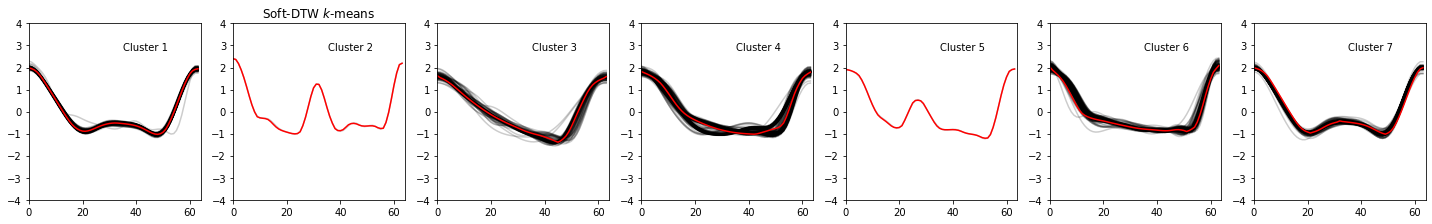

In [39]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=8,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)
plt.figure(figsize=(20,20))

for yi in range(7):
    plt.subplot(7, 7, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

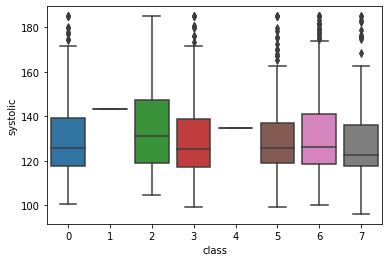

In [40]:
blood_df["class"] = y_pred
sns.boxplot(x="class", y="systolic", data=blood_df)